/tmp/ipykernel_29741/2459984741.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=45)


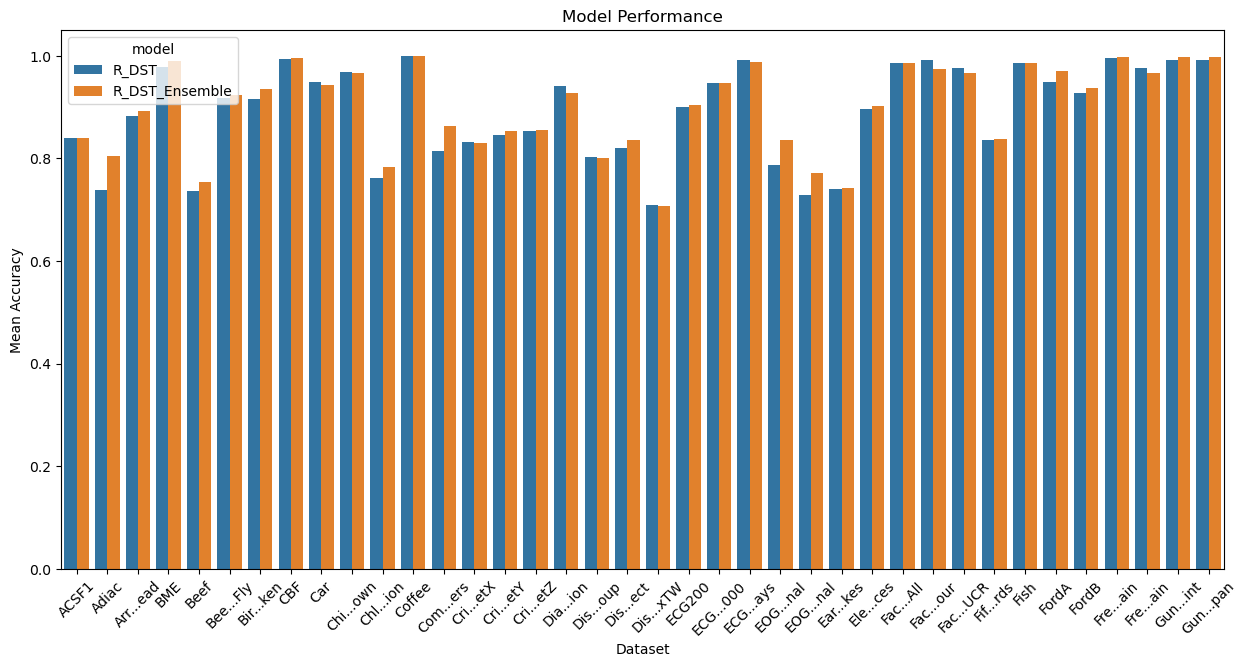

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载CSV文件
df = pd.read_csv('./New_CV_30_results_default.csv')
# 只截取前38个数据集
df = df[df['dataset'].isin(df['dataset'].unique()[:38])]

# 创建一个新的DataFrame，其中包含每个模型在每个数据集上的平均准确率
df_mean = df.groupby(['dataset', 'model'])['acc_mean'].mean().unstack().reset_index()

# 使用seaborn绘制条形图
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df_mean.melt(id_vars='dataset', value_name='acc_mean', var_name='model'), x='dataset', y='acc_mean', hue='model')
plt.title('Model Performance')
plt.xlabel('Dataset')
plt.ylabel('Mean Accuracy')

# 截取并显示部分x轴标签
new_labels = [label[:3] + '...' + label[-3:] if len(label) > 6 else label for label in df_mean['dataset']]
ax.set_xticklabels(new_labels, rotation=45)

# 显示图表
plt.show()


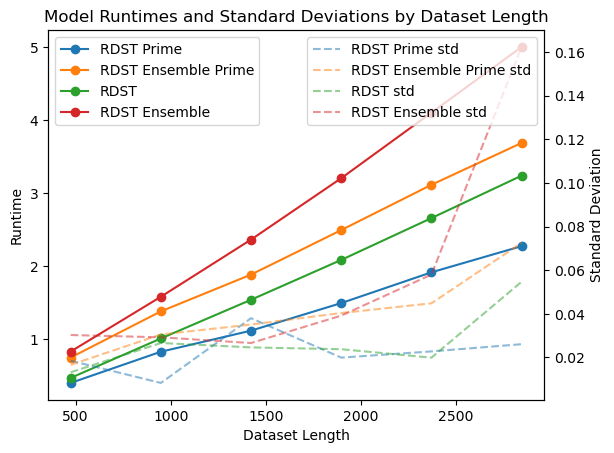

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('./benchmark.csv')

# 提取数据
lengths = df.iloc[:, 0].values
models = ['RDST Prime', 'RDST Ensemble Prime', 'RDST', 'RDST Ensemble']
runtimes = df.iloc[:, 1:5]
stds = df.iloc[:, 5:9]

# 创建图表
fig, ax1 = plt.subplots()

# 绘制运行时间
for i in range(len(models)):
    ax1.plot(lengths, runtimes.iloc[:, i], marker='o', label=models[i])

# 添加标签
ax1.set_xlabel('Dataset Length')
ax1.set_ylabel('Runtime')
ax1.set_title('Model Runtimes and Standard Deviations by Dataset Length')

# 显示图例
ax1.legend(loc='upper left')

# 创建第二个y轴并绘制标准差
ax2 = ax1.twinx()
for i in range(len(models)):
    ax2.plot(lengths, stds.iloc[:, i], linestyle='dashed', label=models[i] + ' std', alpha=0.5)

# 添加标签
ax2.set_ylabel('Standard Deviation')

# 显示图例
ax2.legend(loc='upper right')

# 显示图表
plt.show()
